In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/example-recorder/2024_04_26_10_02_SLSQP.pkl


In [5]:
%%capture
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/TopFarm2.git

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking unserializable_options
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings


/opt/conda/lib/python3.10/site-packages/topfarm/_topfarm.py:231: UserWarning: Number of turbines is inferred as zero. Please specify number of turbines as 'n_wt' if applicable
  warnings.warn("Number of turbines is inferred as zero. Please specify number of turbines as 'n_wt' if applicable")


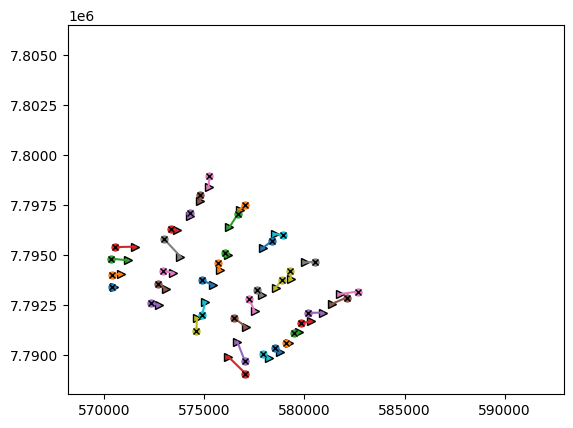

In [4]:
from topfarm.plotting import XYPlotComp
from topfarm import TopFarmProblem, TopFarmListRecorder
import pandas as pd
import numpy as np

rec_path = '/kaggle/input/example-recorder/2024_04_26_10_02_SLSQP.pkl'

x_min = 570253.5636457754
x_max = 590900.1481214832
y_min = 7789067.017756319
y_max = 7805454.597914555

recorder = TopFarmListRecorder().load(rec_path)
problem = TopFarmProblem(design_vars={'x': [], 'y': []},
                         plot_comp=XYPlotComp())
problem.recorder = recorder
problem.plot_comp.init_plot(np.array([[x_min, y_min], [x_max, y_max]]))
problem.plot_comp.plot_initial2current(recorder['x'][0], recorder['y'][0], recorder['x'][-1], recorder['y'][-1])
problem.plot_comp.plot_current_position(recorder['x'][-1], recorder['y'][-1])
